In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
from Adam import AdamOptim
from Logreg import LogisticRegression

In [3]:
from sklearn.impute import SimpleImputer
url = '/home/rucinskij/AML/PROJ1/2024L-DSAdvancedML/projects/project1/group3/Narozniak_Czerwonski_Rucinski/src/data/SAheart.csv'
dataframe = pd.read_csv(url)
data = dataframe.values
dataframe.head()
X,y = data[:,:-1], data[:,-1]
X[:,4] = LabelEncoder().fit_transform(X[:,4])
y = LabelEncoder().fit_transform(y)

imputer_X = SimpleImputer(strategy='mean')
X_imputed = imputer_X.fit_transform(X)

imputer_y = SimpleImputer(strategy='most_frequent')
y_imputed = imputer_y.fit_transform(y.reshape(-1, 1)).flatten()

X_train, X_test, y_train, y_test = train_test_split(X_imputed, y_imputed, test_size=0.2, random_state=42)
X_train

array([[1.660e+02, 8.000e-01, 5.630e+00, ..., 3.472e+01, 2.880e+01,
        6.000e+01],
       [1.180e+02, 1.200e-01, 1.960e+00, ..., 2.001e+01, 2.420e+00,
        1.800e+01],
       [1.260e+02, 5.100e+00, 2.960e+00, ..., 2.552e+01, 1.234e+01,
        3.800e+01],
       ...,
       [1.300e+02, 8.000e-02, 5.590e+00, ..., 2.498e+01, 6.270e+00,
        4.300e+01],
       [1.360e+02, 0.000e+00, 1.770e+00, ..., 2.151e+01, 2.060e+00,
        1.600e+01],
       [1.180e+02, 0.000e+00, 4.340e+00, ..., 3.218e+01, 3.910e+00,
        4.600e+01]])

In [3]:
from sklearn.impute import SimpleImputer
url = '/home/rucinskij/AML/PROJ1/2024L-DSAdvancedML/projects/project1/group3/Narozniak_Czerwonski_Rucinski/src/data/tb_pro_players_matches.csv'
dataframe = pd.read_csv(url)
data = dataframe.values
data = np.delete(data, [22, 179], 1)
dataframe.head()

X,y = data[:,3:], data[:,2]
y = LabelEncoder().fit_transform(y)

imputer_X = SimpleImputer(strategy='mean')
X_imputed = imputer_X.fit_transform(X)

imputer_y = SimpleImputer(strategy='most_frequent')
y_imputed = imputer_y.fit_transform(y.reshape(-1, 1)).flatten()

X_train, X_test, y_train, y_test = train_test_split(X_imputed, y_imputed, test_size=0.2, random_state=42)
sum(y_test == np.nan)

0

In [2]:
from sklearn.impute import SimpleImputer
url = '/home/rucinskij/AML/PROJ1/2024L-DSAdvancedML/projects/project1/group3/Narozniak_Czerwonski_Rucinski/src/data/banana_quality.csv'
dataframe = pd.read_csv(url)
data = dataframe.values
dataframe.head()

X,y = data[:,:-1], data[:,-1]
y = LabelEncoder().fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:

from sklearn.impute import SimpleImputer
url = '/home/rucinskij/AML/PROJ1/2024L-DSAdvancedML/projects/project1/group3/Narozniak_Czerwonski_Rucinski/src/data/nba-players.csv'
dataframe = pd.read_csv(url)
dataframe = dataframe.drop('name', axis = 1)
data = dataframe.values
dataframe.head()

X,y = data[:,:-1], data[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
from utils import createFeatureInteractions
X_int = createFeatureInteractions(X_train)
print(len(X_train[0]),len(X_int[0]))

9 45


In [15]:
from utils import fitComparisonModels
y_lda, y_qda, y_dt, y_rf = fitComparisonModels(X_train, y_train, X_test)
accuracy_score(y_test, y_lda), accuracy_score(y_test, y_qda), accuracy_score(y_test, y_dt), accuracy_score(y_test, y_rf)

(0.746268656716418, 0.6940298507462687, 0.6529850746268657, 0.7089552238805971)

In [4]:
X_train.shape

(6400, 7)

0.6175373134328358
0.6305970149253731


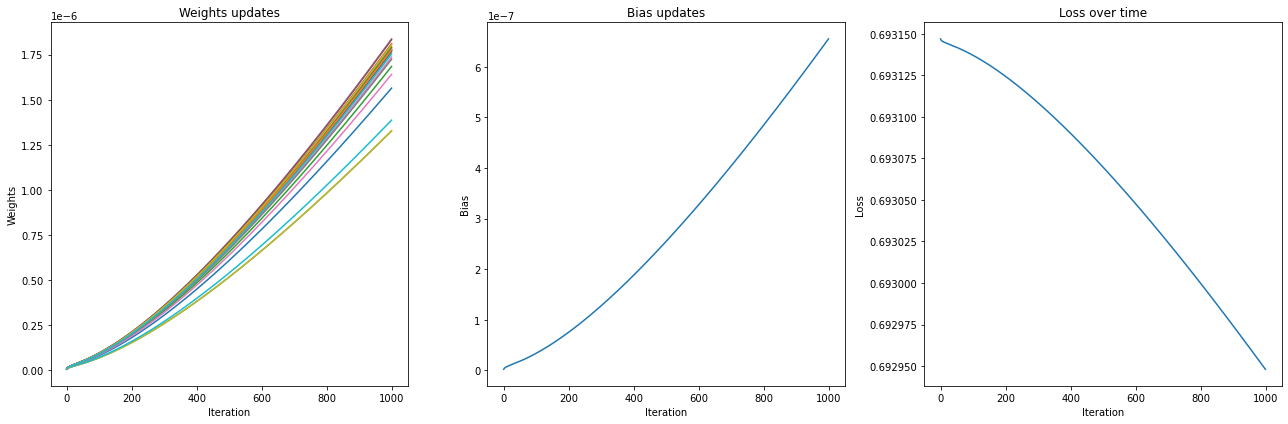

In [16]:
from Adam import AdamOptim
from Logreg import LogisticRegression

logistic_regression_model = LogisticRegression(input_dim=X_train.shape[1])
adam_optimizer = AdamOptim(eta = 1e-10) 

logistic_regression_model.train(X_train, y_train, optimizer=adam_optimizer, patience=5, epochs=1000, batch_size=32)
y_pred_train=logistic_regression_model.predict(X_train).round()
print(accuracy_score(y_train, y_pred_train))
y_pred = logistic_regression_model.predict(X_test)
print(accuracy_score(y_test, y_pred.round()))

logistic_regression_model.plot_params()
